In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
class SLP:
  def __init__(self, input_dim, output_dim):
    self.W = np.random.randn(input_dim, output_dim) * 0.01
    self.b = np.zeros((1, output_dim))

  def relu(self, x):
      return np.maximum(0, x)

  def sigmoid(self, x):
      return np.where(x >= 0, 1 / (1 + np.exp(-x)), np.exp(x) / (1 + np.exp(x)))

  def softmax(self, x):
      exps = np.exp(x - np.max(x))
      return exps / np.sum(exps, axis=1, keepdims=True)

  def cross_entropy_loss(self, y_true, y_pred):
      return -np.mean(y_true * np.log(y_pred))

  def train(self, X_train, y_train, learning_rate=0.01, num_epochs=1000):
      num_samples = X_train.shape[0]
      train_loss = []
      for epoch in range(num_epochs):
          # Forward Pass
          z = np.dot(X_train, self.W) + self.b
          a = self.sigmoid(z)

          # Calculate Loss
          loss = self.cross_entropy_loss(y_train, a)
          train_loss.append(loss)

          # Backward Pass
          dz = (y_train-a) * a * (1 - a)
          dW = np.dot(X_train.T, dz)
          db = np.sum(dz, axis=0, keepdims=True)

          # Update weights and biases
          self.W += learning_rate * dW
          self.b += learning_rate * db

          if epoch % 100 == 0:
              print(f"Epoch {epoch} - Loss: {loss:.4f}")

      plt.plot(train_loss)
      plt.title("Training Loss")
      plt.xlabel("Epoch")
      plt.ylabel("Loss")
      plt.show()

      return self

  def predict(self, X):
      z = np.dot(X, self.W) + self.b
      a = self.sigmoid(z)
      return np.argmax(a, axis=1)

  def pred2(self, X) :
      z = np.dot(X, self.W) + self.b
      a = self.sigmoid(z)
      return a



Epoch 0 - Loss: 0.2304
Epoch 100 - Loss: 0.1234
Epoch 200 - Loss: 0.1138
Epoch 300 - Loss: 0.1078
Epoch 400 - Loss: 0.1037


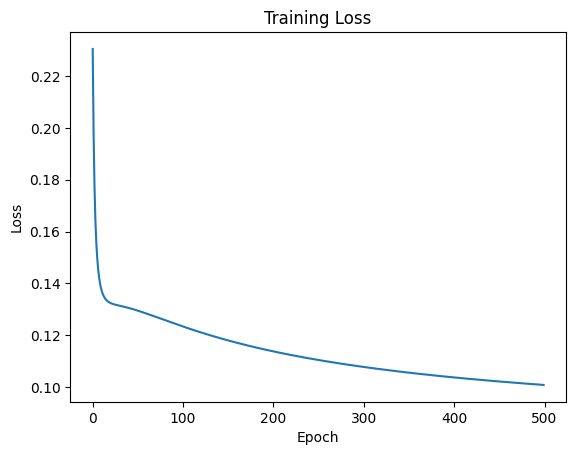

Accuracy: 0.8889


In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Convert target labels to one-hot encoding
y_train_onehot = np.eye(np.unique(y_train).size)[y_train]


# Create and train the model
model = SLP(input_dim=X.shape[1], output_dim=y_train_onehot.shape[1])
model.train(X_train, y_train_onehot, learning_rate=0.01, num_epochs=500)

# Predict and compare with original labels
y_pred = model.predict(X_test)


accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")



ROC AUC: 0.7887931034482758


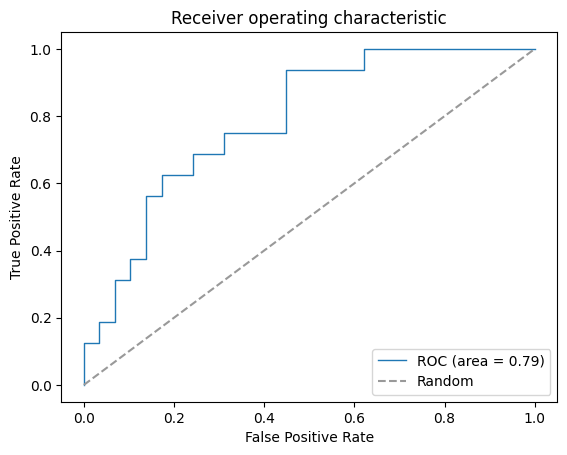

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test_onehot = np.eye(np.unique(y_test).size)[y_test]
y_pred_onehot  = model.pred2(X_test);


fpr, tpr, thresholds = roc_curve(y_test_onehot[:,1], y_pred_onehot[:,1])
roc_auc = auc(fpr, tpr)
print('ROC AUC:', roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()